# Using and Displaying Images

In this notebook, we cover some of the options you have available for displaying two-dimensional information.

## Inside Jupyter Notebooks

Let's start with image displays in jypyter notebooks, since we are in one right now.

In [2]:
# configure for static (not zoomable) images
%matplotlib inline 
import pylab as plt
import numpy as np

In [3]:
data = np.random.normal(size=(20,20)) # generate a 20x20 array of random data

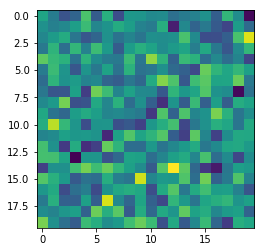

In [4]:
plt.figure()
plt.imshow(data)
plt.show()

That was pretty simple, but there is some complexity under the hood.

### Where Did These Colors Come From?

We started with scalar data for each point in the pixel, meaning that we had only one number at each location in our two-dimensional matrix.  Colors, on the other hand, are three-dimensional (red, blue, green) vectors.  Technically, modern images also have a 4th dimension, alpha, which controls transparency.

To map scalar data onto color, we need something called a *colormap*, which defines a (one-dimensional) path through RGB space and parametrizes that path so that your scalar number encodes a distance along that path.  Once you have this, you can plug in a value into your colormap, it gives you back an RGB color, and the plotter can use that color to display to the screen.

There are many, many colormaps.  <a href="https://matplotlib.org/examples/color/colormaps_reference.html"> Here are a few.</a>

Finally, colormaps by default map the range of output colors to an input interval [0,1].  Your data are mapped onto this interval by the vmin and vmax arguments, where vmin is the value that maps to 0 and vmax is the value that maps to 1.  If you don't provide these arguments, they default to the min/max of your input data.

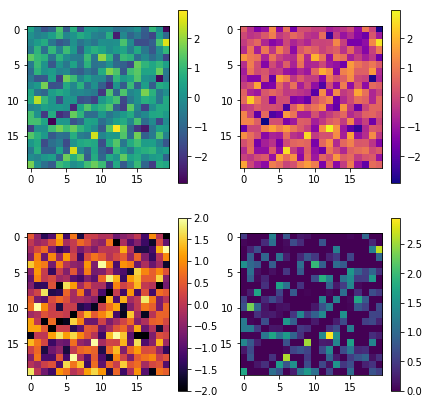

In [5]:
plt.figure(figsize=(7,7))
plt.subplot(2,2,1)
plt.imshow(data)
plt.colorbar()
plt.subplot(2,2,2)
plt.imshow(data, cmap='plasma')
plt.colorbar()
plt.subplot(2,2,3)
plt.imshow(data, cmap='inferno', vmax=2, vmin=-2)
plt.colorbar()
plt.subplot(2,2,4)
plt.imshow(data, vmin=0)
plt.colorbar()
plt.show()

### Interpolation

Interpolation is a mathematical method to construct new data points to fill in a discrete data set -- put another way, it's a way of converting discrete data sets into continuous functions.

Let's say you have some set of sampled data points which represent the values of a function for a limited number of values of some independent variable. In order to estimate the value of that function for some intermediate value between points, you will need to interpolate.

When it comes to presenting data images, there's a time and a place for using interpolation. For example, if you want to present some kind of spatial map, interpolation can be helpful! It can help make your image more coherent and realistic.

However, if you're trying to plot bin values and you need to know the power in a specific channel, then interpolating your plot will be a bad choice.

There are many interpolation algorithms that you can use to present you data. For more information about the standard options in matplotlib, check out this link: https://matplotlib.org/gallery/images_contours_and_fields/interpolation_methods.html

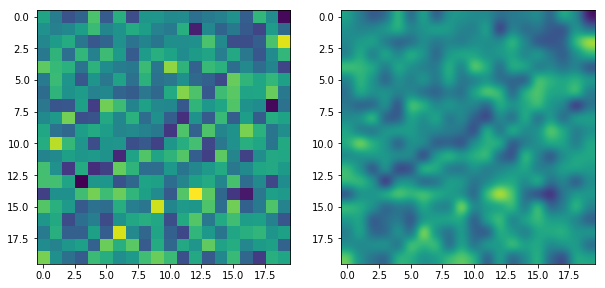

In [13]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(data, interpolation=None)
plt.subplot(1,2,2)
plt.imshow(data, interpolation='gaussian')
plt.show()

### Aspect Ratio

One thing that can be slightly unpredictable in Python is how it handles the aspect ratio of your images. If you let Python make those choices for you, it can lead to misleading or confusing presentations of your data.

There are three options for setting the aspect ration in your code:

1. aspect = 'auto': This lets Python set its own aspect ratio automatically, which will depend on the window and image parameters. This means it can vary a lot and in ways that are unexpected to you. 
2. aspect = 'equal': This enforces the same scaling from data to plot units for both axes, i.e. this sets an aspect ratio of 1.
3. aspect = num: Sets the scaling such that the height of each pixel is num * width. If aspect = 1, then you will receive the same results as aspect = 'equal'.

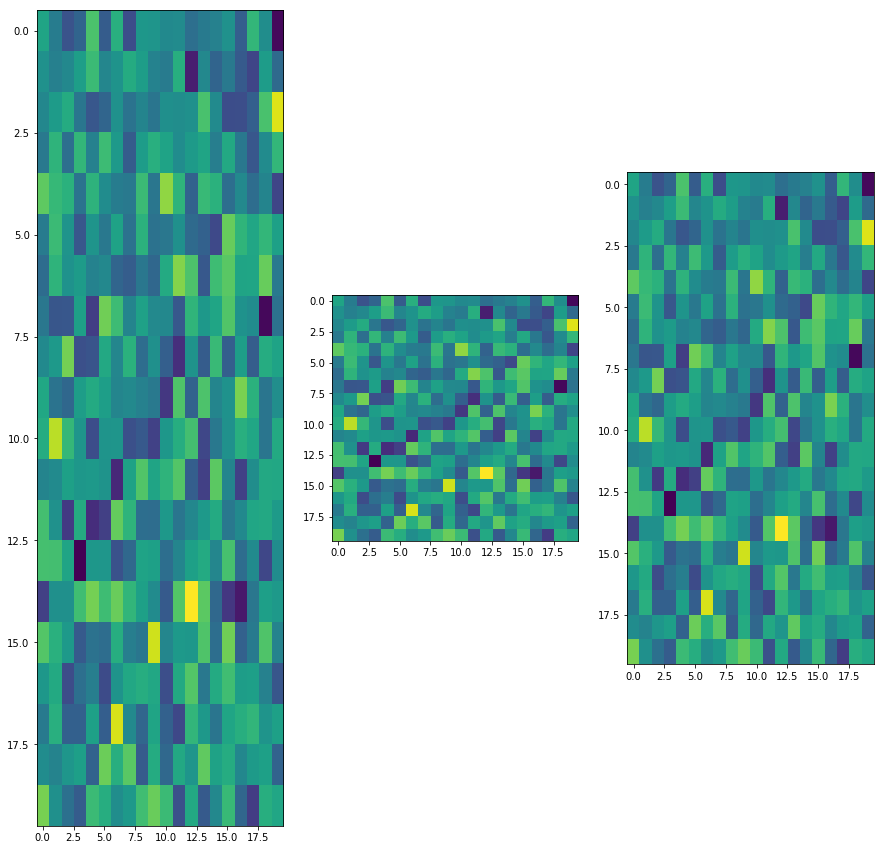

In [17]:
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(data, aspect='auto')
plt.subplot(1,3,2)
plt.imshow(data, aspect='equal')
plt.subplot(1,3,3)
plt.imshow(data, aspect=2)
plt.show()

### Extent

You can also set the maximum and minimum values on your axes by using the extent option. It takes four values in a list like so: 

    extent=[horizontal_min,horizontal_max,vertical_min,vertical_max]

Using this, you can relabel the plot axes with the true values rather than the bin numbers.

NOTE: This does not change which array values you are actually plotting! It just changes their label.

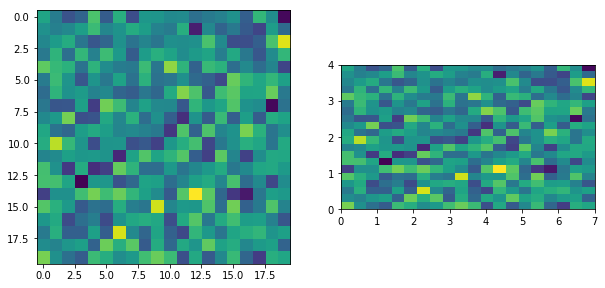

In [23]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(data, aspect='equal')
plt.subplot(1,2,2)
plt.imshow(data, aspect='equal', extent=[0,7,0,4])
plt.show()

### One Final Quirk

One oddity of Python image plotting is that it automatically sets the origin to be in the top left corner of the plot rather than the bottom left that we're more used to. If you want to keep the origin in the bottom left corner like how you've seen it your entire life, using the origin option:

    origin = 'lower'
    
Using this command flips the y-axis to force the origin into the bottom left corner. To flip it back, use origin = 'upper'.

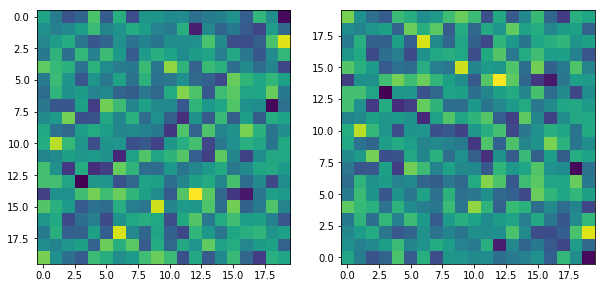

In [24]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(data)
plt.subplot(1,2,2)
plt.imshow(data, origin = 'lower')
plt.show()

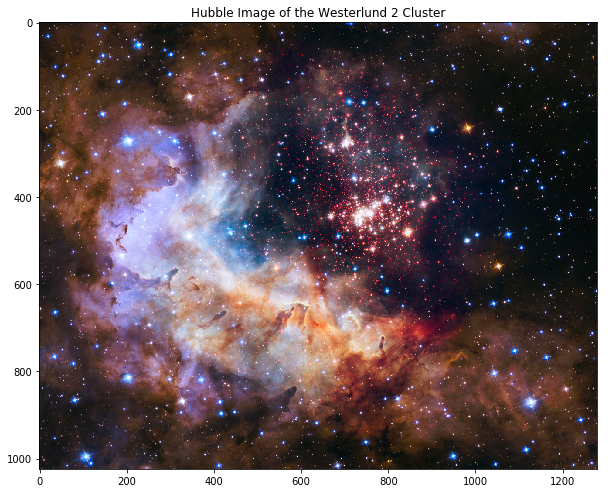

In [45]:
import matplotlib.image as plimg
img = plimg.imread('heic1509a.jpg')
# split into red, green, blue components
r_img = img[:,:,0]
g_img = img[:,:,1]
b_img = img[:,:,2]
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.title('Hubble Image of the Westerlund 2 Cluster')
plt.show()

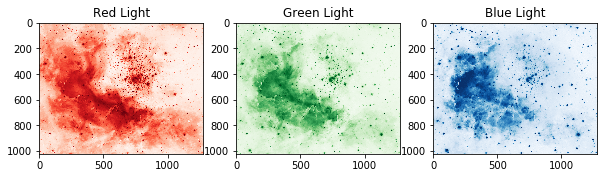

In [46]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(r_img, cmap='Reds')
plt.title('Red Light')
plt.subplot(1,3,2)
plt.imshow(g_img, cmap='Greens')
plt.title('Green Light')
plt.subplot(1,3,3)
plt.imshow(b_img, cmap='Blues')
plt.title('Blue Light')
plt.show()